# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [3]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/retailmax.csv')


### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

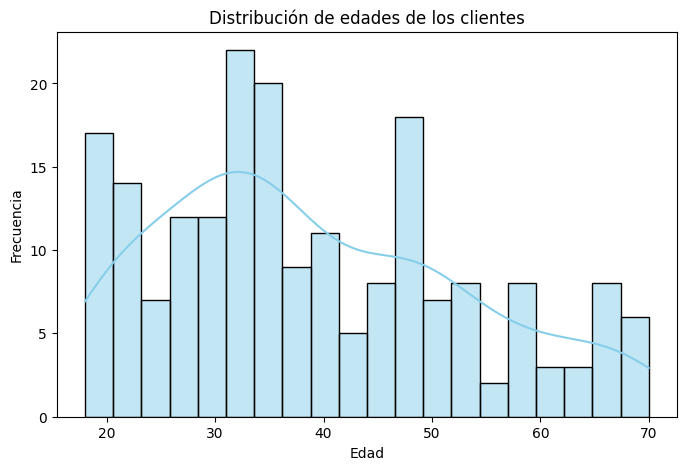

In [4]:
# tu código aquí
# Histograma de edades
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

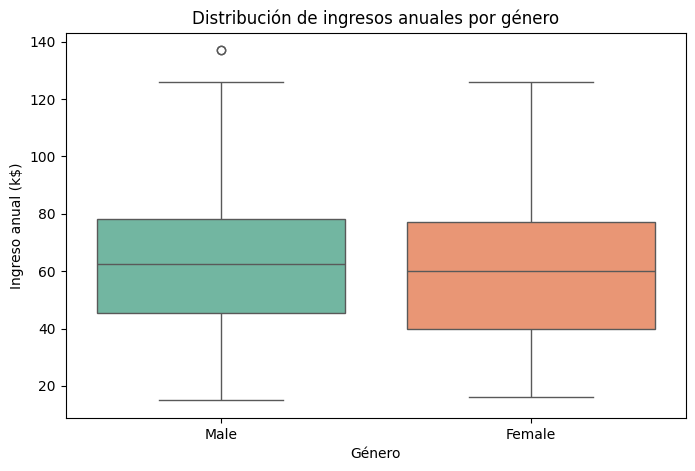

In [5]:
# tu código aquí
# Boxplot de ingresos anuales por género
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="Set2")
plt.title("Distribución de ingresos anuales por género")
plt.xlabel("Género")
plt.ylabel("Ingreso anual (k$)")
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

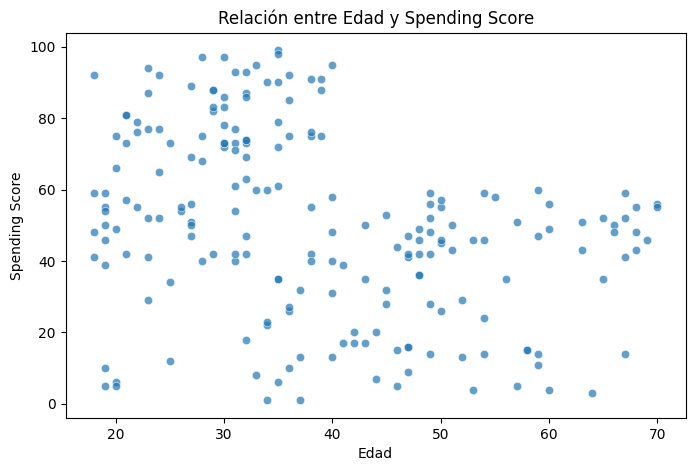

In [7]:
# tu código aquí
# 1. Scatter plot: Edad vs Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df, alpha=0.7)
plt.title("Relación entre Edad y Spending Score")
plt.xlabel("Edad")
plt.ylabel("Spending Score")
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

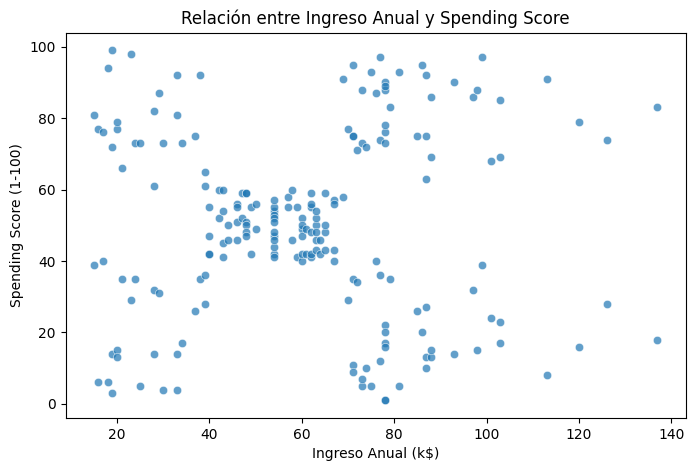

Coeficiente de correlación de Pearson: 0.01


In [8]:
# tu código aquí
# 1. Scatter plot: Ingreso vs Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, alpha=0.7)
plt.title("Relación entre Ingreso Anual y Spending Score")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# 2. Calcular correlación de Pearson
correlacion = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"])
print(f"Coeficiente de correlación de Pearson: {correlacion:.2f}")


### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

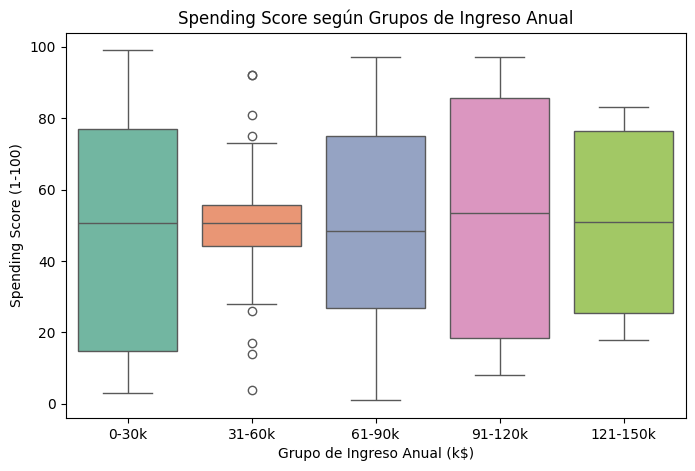

In [9]:
# tu código aquí
# Crear rangos de ingreso (bins)
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], 
                           bins=[0, 30, 60, 90, 120, 150],
                           labels=["0-30k", "31-60k", "61-90k", "91-120k", "121-150k"])

# Gráfica de cajas (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x="IncomeGroup", y="Spending Score (1-100)", data=df, palette="Set2")
plt.title("Spending Score según Grupos de Ingreso Anual")
plt.xlabel("Grupo de Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

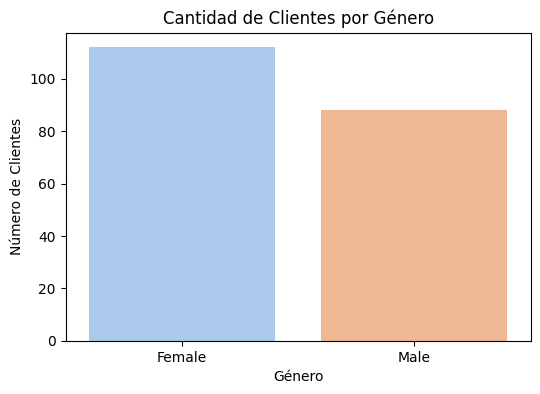

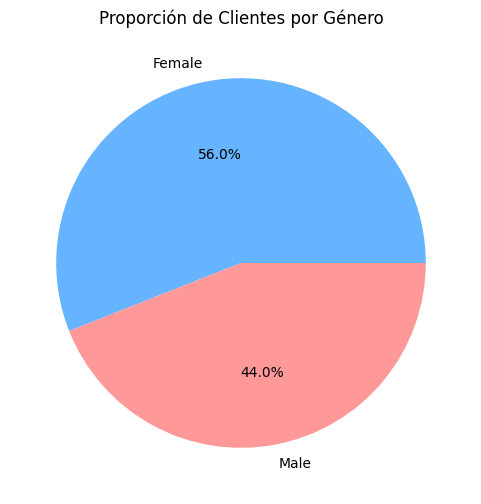

In [10]:
# tu código aquí
# Conteo de clientes por género
conteo_genero = df["Gender"].value_counts()

# 1. Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette="pastel")
plt.title("Cantidad de Clientes por Género")
plt.xlabel("Género")
plt.ylabel("Número de Clientes")
plt.show()

# 2. Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo_genero, labels=conteo_genero.index, autopct="%1.1f%%", colors=["#66b3ff", "#ff9999"])
plt.title("Proporción de Clientes por Género")
plt.show()


### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

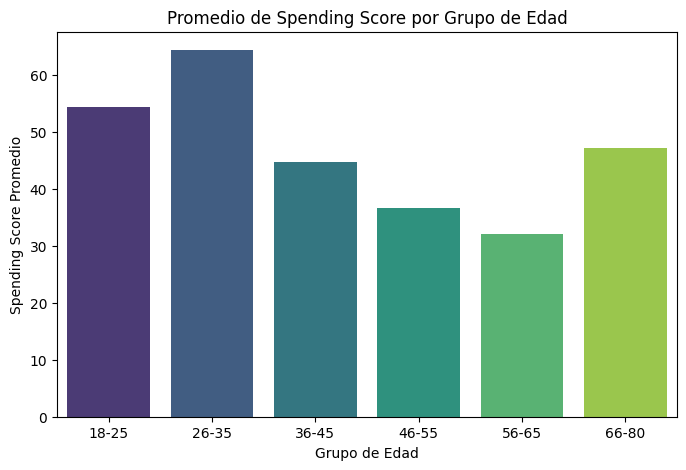

In [11]:
# tu código aquí
# Crear grupos de edad (bins)
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-80"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

# Calcular el promedio de Spending Score por grupo de edad
age_spending = df.groupby("AgeGroup")["Spending Score (1-100)"].mean()

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x=age_spending.index, y=age_spending.values, palette="viridis")
plt.title("Promedio de Spending Score por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Spending Score Promedio")
plt.show()


### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

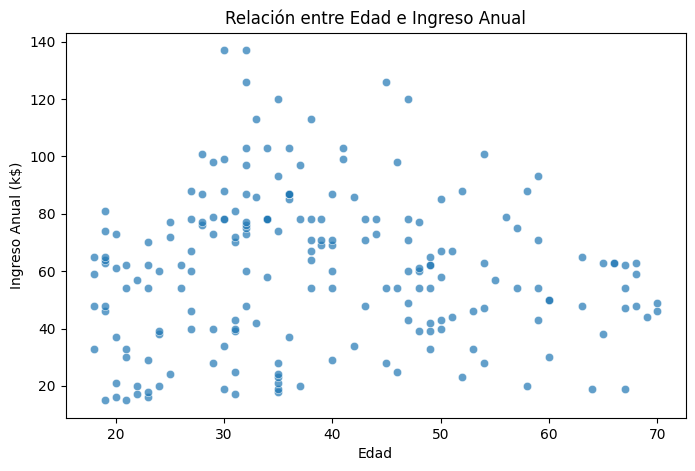

In [12]:
# tu código aquí
# Gráfica de dispersión: Edad vs Ingreso Anual
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df, alpha=0.7)
plt.title("Relación entre Edad e Ingreso Anual")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.show()


### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

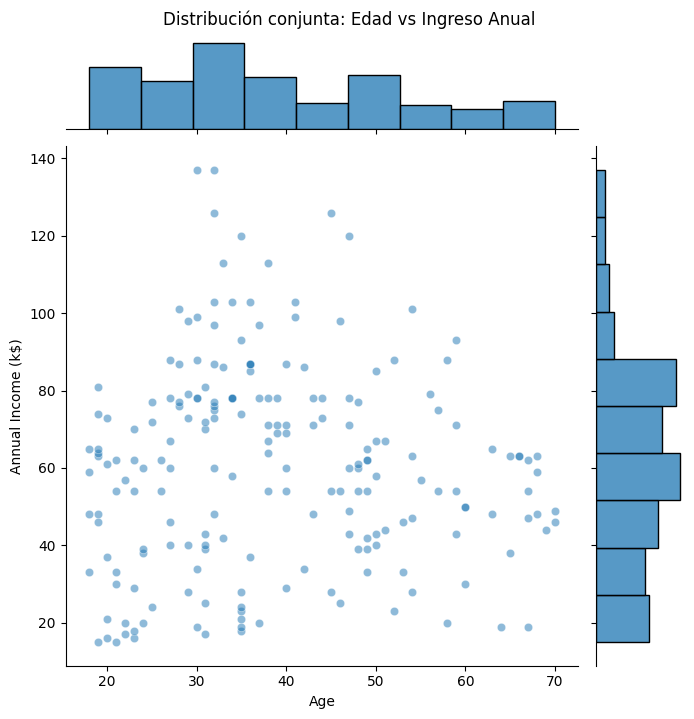

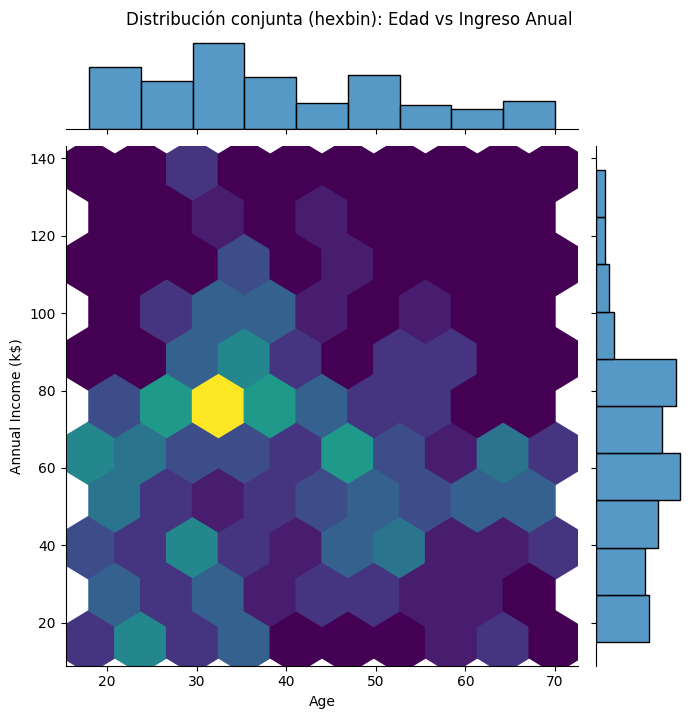

In [13]:
# tu código aquí
# 1. Jointplot con scatter + KDE
sns.jointplot(x="Age", y="Annual Income (k$)", data=df, kind="scatter", height=7, alpha=0.5)
plt.suptitle("Distribución conjunta: Edad vs Ingreso Anual", y=1.02)
plt.show()

# 2. Jointplot con hexbin
sns.jointplot(x="Age", y="Annual Income (k$)", data=df, kind="hex", height=7, cmap="viridis")
plt.suptitle("Distribución conjunta (hexbin): Edad vs Ingreso Anual", y=1.02)
plt.show()


### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

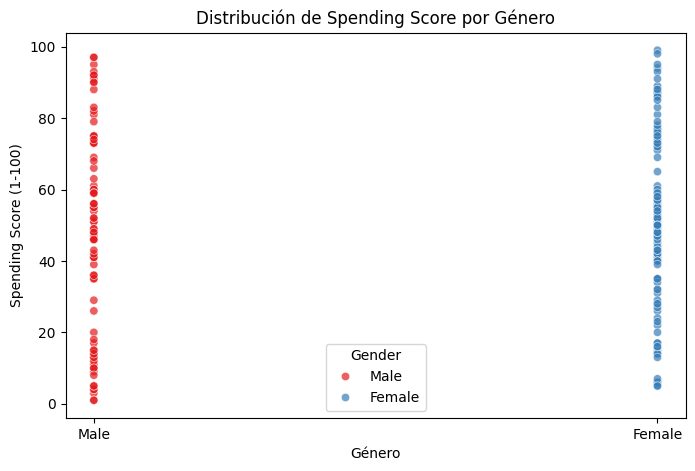

In [15]:
# tu código aquí
# Scatter plot corregido: Spending Score vs Gender
plt.figure(figsize=(8,5))
sns.scatterplot(x="Gender", y="Spending Score (1-100)", data=df, hue="Gender", palette="Set1", alpha=0.7)
plt.title("Distribución de Spending Score por Género")
plt.xlabel("Género")
plt.ylabel("Spending Score (1-100)")
plt.show()
